In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from IPython.core.debugger import set_trace

## Generate some data

In [4]:
def gen_lin_data(a, b, num):
    x = np.arange(0, num)
    y = (a*x+b) + (2*np.random.random((num)))
    return x, y

In [47]:
x, y = gen_lin_data(1, 1, 10)

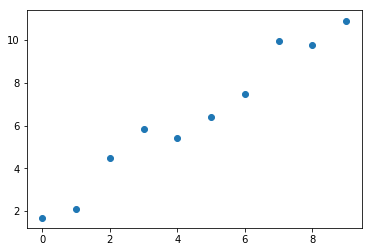

In [48]:
plt.scatter(x, y);

## Notes

Most basic and common form of predictive analysis. It is a linear approach to model the relationshop between a dependant variable(Y) and a few independant variables(X)

### Can be optimised with
- closed form 
- gradient descend

## Linear Regression Closed Form Solution

In [24]:
# implement based on the notes https://mysite.du.edu/~jcalvert/econ/regress.htm
# For y = b0 * x + b1 , where b0 = covariance(x,y)/variance(x) B1 = mean(y) - B1 mean(x)m 

class LinearRegressionClosed:
    def __init__(self):
        self.b0 = None
        self.b1 = None
    
    def fit(self, x, y):
        self.b0 = np.cov(x, y)[0][1]/np.var(x)
        self.b1 = np.mean(y) - self.b0 * np.mean(x)
    
    def predict(self, x):
        y = [(self.b0 *i + self.b1) for i in x]
        return y

In [25]:
LR = LinearRegressionClosed()
LR.fit(x, y)

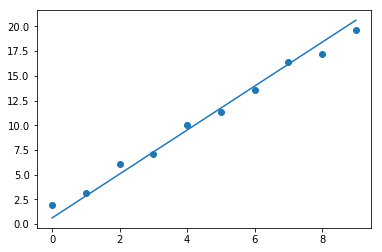

In [26]:
x_fit = range(10)
y_fit = LR.predict(x)
plt.scatter(x, y)
plt.plot(x_fit, y_fit)
plt.show()

## Linear Regression SGD

In [49]:
class LinearRegression(object):

    def __init__(self):
        self.W = None

    def train(self, X, y, learning_rate=1e-3, num_iters=200):
        num_train, dim = X.shape
        num_classes = y.shape[1]
        
        if self.W is None:
            self.W = 0.001 * np.random.randn(dim, num_classes)
        
        loss_history = []
        
        for it in range(num_iters):
            loss, grad = self.loss(X, y)
            loss_history.append(loss)

            self.W += -learning_rate * grad
                    
            if it % 50 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))
                
        return loss_history  
    
    def loss(self, X, y):
        loss = 0.0
        dW = np.zeros_like(self.W)
        
        # Forward pass
        scores = X.dot(self.W)
        
        # compute loss
        loss = np.sum((np.square(scores-y)))
        
        # compute gradient
        dscores = scores - y
        dW = X.T.dot(dscores)

        return loss, dW
    
    def predict(self, X):
        y_pred = X.dot(self.W) 
        return y_pred

In [61]:
x_new = x.reshape((x.shape[0],-1))
y_new = y.reshape((y.shape[0],-1))
model = LinearRegression()
loss_history = model.train(x_new, y_new, learning_rate=0.005, num_iters=200)

iteration 0 / 200: loss 501.029597
iteration 50 / 200: loss 12.711199
iteration 100 / 200: loss 12.711199
iteration 150 / 200: loss 12.711199


In [54]:
x_fit = np.arange(10).reshape((10,1))
y_fit = model.predict(x_fit)

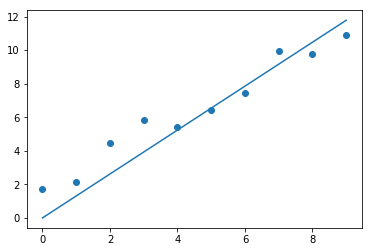

In [52]:
plt.scatter(x,y)
plt.plot(x_fit, y_fit)
plt.show()

## Linear Regression with Scikit Learn

In [82]:
from sklearn import linear_model
SK_model = linear_model.LinearRegression()
SK_model.fit(x_new,y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
x_fit = np.arange(10).reshape((10,1))
y_fit = SK_model.predict(x_fit)

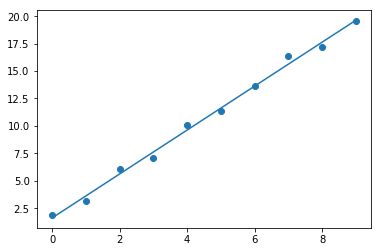

In [84]:
plt.scatter(x,y)
plt.plot(x_fit, y_fit)
plt.show()